In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date = max(session.query(measurement.date).all())
date

('2017-08-23',)

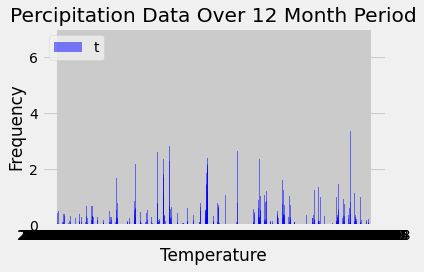

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

prcp_12mo = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-08-22').order_by(measurement.date.desc()).all()
prcp_12mo

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column

column_name = ['Date', 'Precipitation']

df_prcp = pd.DataFrame(prcp_12mo, columns = column_name)
df_prcp

# Sort the dataframe by date
df_prcp.set_index('Date', inplace = True)
prcp = df_prcp.reset_index()

# Use Pandas Plotting with Matplotlib to plot the data

plt.bar(prcp['Date'],prcp['Precipitation'], color ='blue',alpha = .5, align="center", width = 0.5)
plt.title("Percipitation Data Over 12 Month Period")
plt.legend("tobs")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.tight_layout()
# #plt.show()


In [177]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#df_prcp_agg = df_prcp.groupby("Date").aggregate(['mean', 'median', 'var', 'std','sem'])
#round(df_prcp_agg["Date"],2)
#df_prcp_agg

df_prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [178]:
# Design a query to calculate the total number stations in the dataset
station_no = session.query(station.id).count()
station_no

9

In [190]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).order_by(func.count(measurement.date)).all()
active_stations


[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [234]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station=session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281')

max_station = max(session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281'))

min_station = min(session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281'))
avg=session.query(func.avg(measurement.tobs).label('average')).filter(measurement.station=='USC00519281').all()
# mean_station = session.query(func.avg(measurement.station, measurement.tobs).label('average')).\
#     filter(measurement.station == 'USC00519281').all()
#mean_station
#df_prcp.describe()

#active_stations_agg = active_stations.groupby("Stations").aggregate(['mean', 'median', 'var', 'std','sem'])
#round(df_prcp_agg["Date"],2)
#df_prcp_agg
print(min_station)
print(max_station)
print(avg)

('USC00519281', 54.0)
('USC00519281', 85.0)
[(71.66378066378067,)]


Text(0.5, 0, 'Temperature')

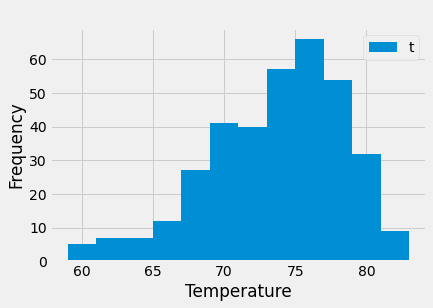

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp = session.query(measurement.station, measurement.date, measurement.tobs).filter(measurement.date > '2016-08-17').filter(measurement.station == 'USC00519281').all()
#station_temp

column_names_temp = ['Station', 'Date', 'Temperature']
df_station = pd.DataFrame(station_temp, columns = column_names_temp)
#df_station

sort = df_station.sort_values(by='Date', ascending = False)

hist = df_station.hist(bins=12)
plt.title( " ")
plt.legend("tobs")
plt.ylabel("Frequency")
plt.xlabel("Temperature")


# Close session

In [ ]:
# Close Session
session.close()